In [1]:
# importing libreries and changing their name

import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [9]:
bank = pd.read_csv("bank.csv")
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<h2>Missing Value analysis</h2>

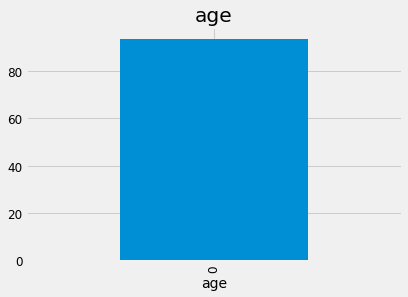

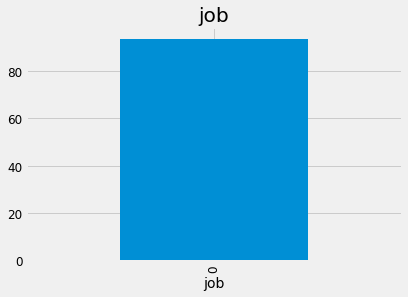

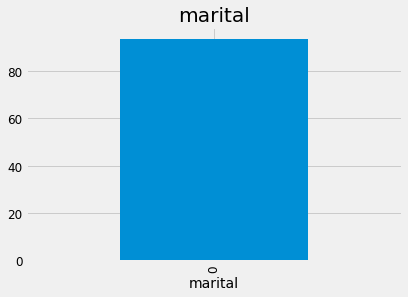

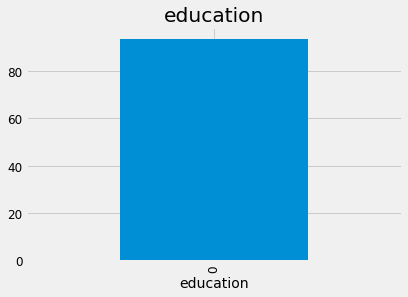

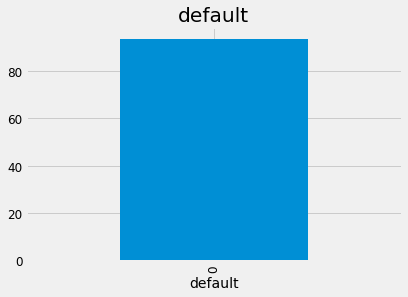

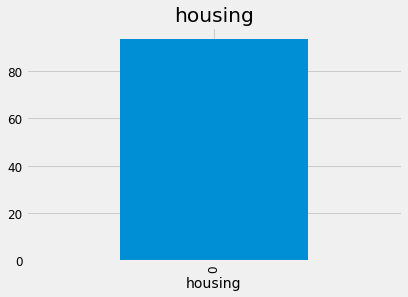

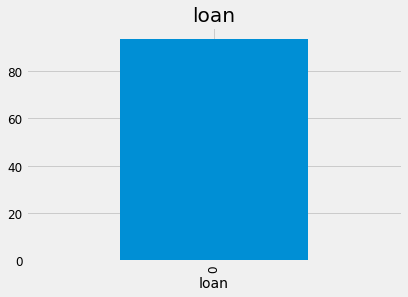

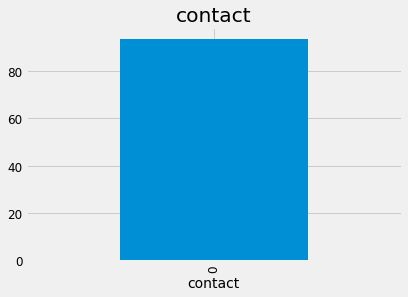

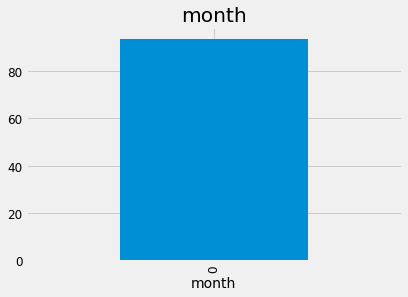

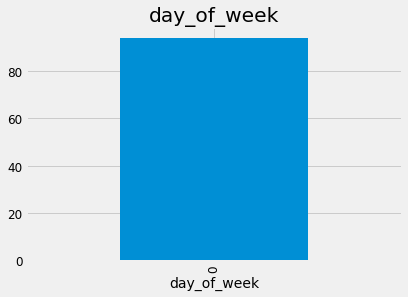

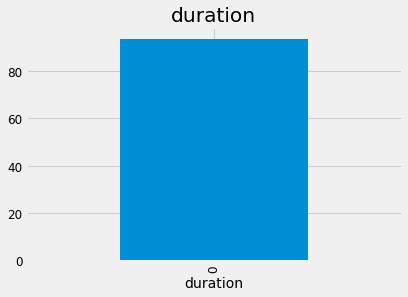

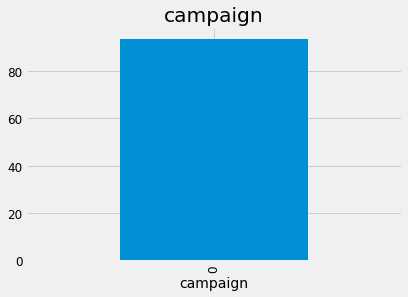

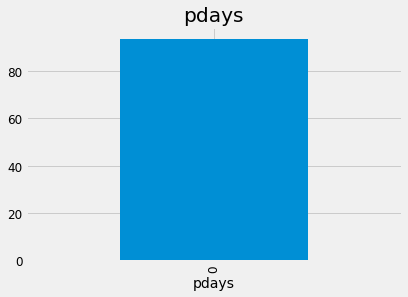

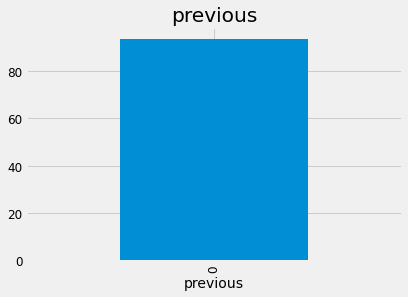

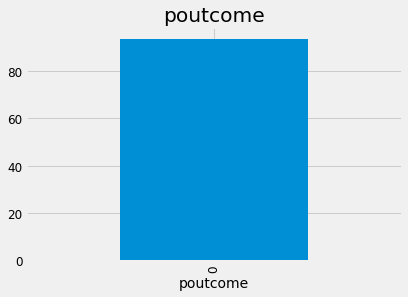

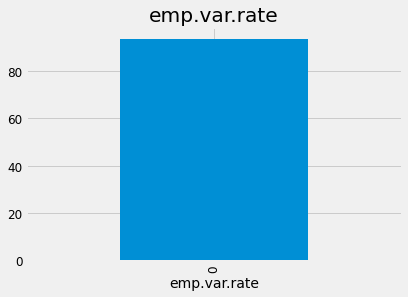

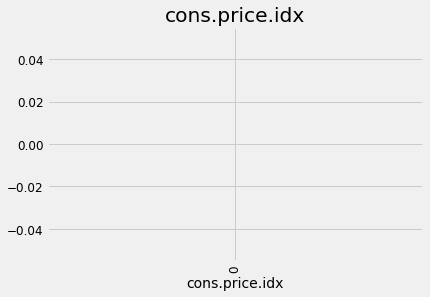

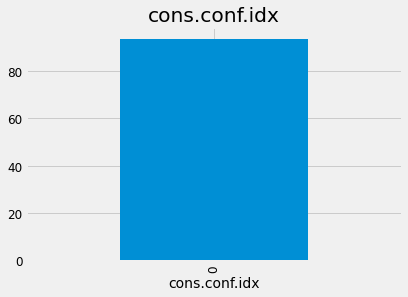

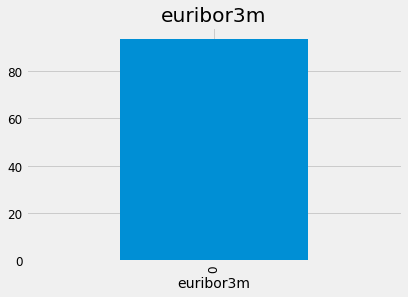

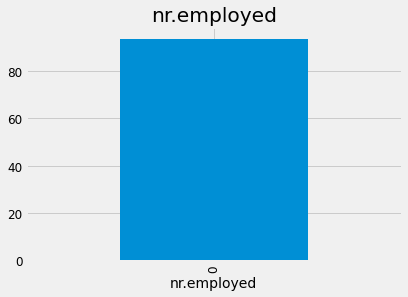

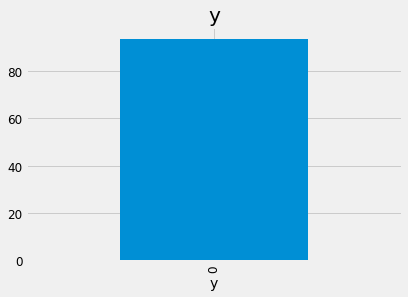

In [11]:
for feature in bank:
    data = bank.copy()
    data[feature] = np.where(data[feature].isnull(),1,0)
    
    data.groupby(feature)["cons.price.idx"].median().plot.bar()
    plt.title(feature)
    plt.show()

<h2>Logistic Regression</h2>

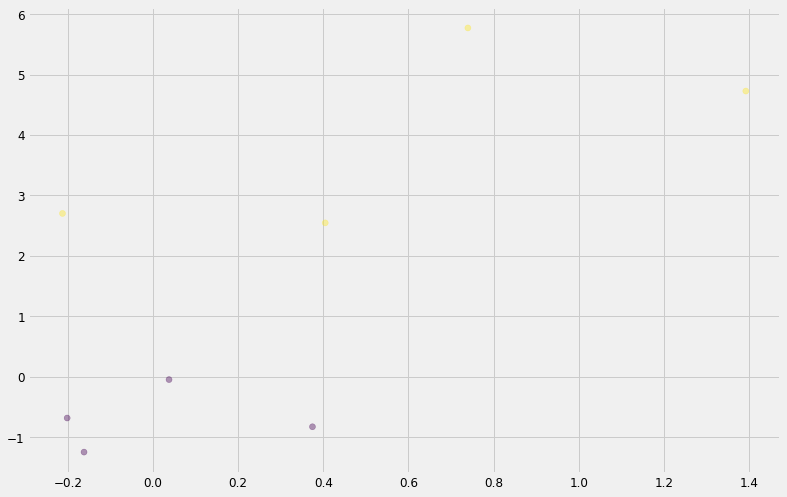

-5.5408141121982375
-1.2799544792727535
-0.806313716819867
-0.5928182544781406
-0.470321373106869
LOGISTIC REGRESSION FROM SRATCH WEIGHTS =>  [-1.34850518  0.05835091  1.98340972]
Accuracy from scratch: 1.0


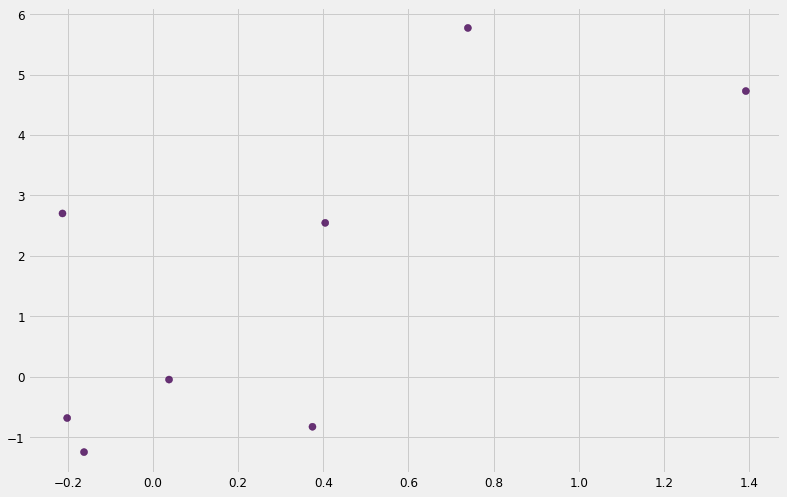

In [12]:
import numpy as np
import matplotlib.pyplot as plt


# GENERATING RANDOM DATA FOR TRAINING TESTING 

np.random.seed(12)
num_observations = 4

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

simulated_separableish_features = np.vstack((x1, x2)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))

# PLOT RANDOMLY GENERATED DATA 

plt.figure(figsize=(12,8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = simulated_labels, alpha = .4)
plt.show()




# BUILDING A LINK FUNCTION


def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))


# DEFINING LOG LIKELIHOOD
features = ['age','campaign','duration','nr.employed']
def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

# BUILDING MAIN LOGISTIC REGRESSION FUNCTION 

def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with log likelihood gradient
        output_error_signal = target - predictions
        
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient

        # Print log-likelihood every so often
        if step % 10000 == 0:
            print (log_likelihood(features, target, weights))
        
    return weights

# WIEGHTS FOR LOGISTIC REGRESSION BUILT FROM SCRATCH

weights = logistic_regression(simulated_separableish_features, simulated_labels,
                     num_steps = 50000, learning_rate = 5e-5, add_intercept=True)
print ("LOGISTIC REGRESSION FROM SRATCH WEIGHTS => ",weights)



final_scores = np.dot(np.hstack((np.ones((simulated_separableish_features.shape[0], 1)),
                                 simulated_separableish_features)), weights)
preds = np.round(sigmoid(final_scores))

print ('Accuracy from scratch: {0}'.format((preds == simulated_labels).sum().astype(float) / len(preds)))

# SOLVED PLOT

plt.figure(figsize = (12, 8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = preds == simulated_labels - 1, alpha = .8, s = 50)
plt.show()

<h2>Navie Bayes</h2>

In [20]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
data['marital']=le.fit_transform(data['marital'])
data['housing']=le.fit_transform(data['housing'])
data['poutcome']=le.fit_transform(data['poutcome'])
data['y']=le.fit_transform(data['y'])
data['default']=le.fit_transform(data['default'])
data['job']=le.fit_transform(data['job'])
data['contact']=le.fit_transform(data['contact'])
data['month']=le.fit_transform(data['month'])
data['education']=le.fit_transform(data['education'])
data['day_of_week']=le.fit_transform(data['day_of_week'])
data['loan']=le.fit_transform(data['loan'])
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0


In [21]:
x=data.drop(['y'],axis=1)
y=data['y']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
predicted= model.predict(X_test) 
print("Predicted Value:", predicted)

from sklearn.metrics import accuracy_score
print(accuracy_score(predicted,y_test))

Predicted Value: [0 0 0 ... 0 0 0]
1.0


<h2>KNN Clusttering</h2>

In [23]:
X = data.drop('y', axis=1)
y = data['y']

In [24]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=101)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))

[[12357]]


In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12357

    accuracy                           1.00     12357
   macro avg       1.00      1.00      1.00     12357
weighted avg       1.00      1.00      1.00     12357



In [28]:
print(accuracy_score(y_test,y_pred))

1.0


<h2>Ada Boost</h2>

In [29]:
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier()

In [30]:
pred = ad.fit(Xfrom_train,y_train).predict(X_test)

In [31]:
accuracy_score(y_test, pred)

1.0

<h3>Tabulate the performance metrics of all the above models
and tell which model performs better in predicting if the
client will subscribe to term deposit or not<h3>

In [39]:
######### Navie Bayes ##############
x=data.drop(['duration'],axis=1)
y=data['duration']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
predicted= model.predict(X_test) 
print("Predicted Value of Navie Bayes:", predicted)

from sklearn.metrics import accuracy_score
print(accuracy_score(predicted,y_test))

########## AdaBoost ###############
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier()
predicted = ad.fit(X_train,y_train).predict(X_test)
print("Predicted Value of AdaBost:", predicted)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))

Predicted Value of Navie Bayes: [1339 1129 1009 ... 1025 1389  737]
0.0
Predicted Value of AdaBost: [124 124 124 ... 124 124 124]


ValueError: Found input variables with inconsistent numbers of samples: [10297, 12357]

<h1>PART 2</h1>

<h2>MonthWiseMarketArrivals_Clean</h2>

In [41]:
market = pd.read_csv("MonthWiseMarketArrivals_Clean.csv")
market.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [43]:
# Remove columns which are not required in predictions

cols = ['market','month','state','city']
market.drop(cols, axis = 1, inplace = True)
market.head()

,year,quantity,priceMin,priceMax,priceMod,date
0,2005,2350,404,493,446,January-2005
1,2006,900,487,638,563,January-2006
2,2010,790,1283,1592,1460,January-2010
3,2011,245,3067,3750,3433,January-2011
4,2012,1035,523,686,605,January-2012


In [46]:
market = market.sort_values('date')

#print the sorted values
print(market.head())

#check any missing values
market.isnull().sum()

      year  quantity  priceMin  priceMax  priceMod        date
5461  1996    192592       136       279       254  April-1996
5462  1997    223608       149       240       214  April-1997
9260  1998     11150        38       272       227  April-1998
5463  1998    119035        76       318       258  April-1998
6489  1998     50600       142       275       217  April-1998


year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
date        0
dtype: int64

In [48]:
#set 'date' as index
market = market.set_index('date')
market.index

Index(['April-1996', 'April-1997', 'April-1998', 'April-1998', 'April-1998',
       'April-1998', 'April-1998', 'April-1998', 'April-1998', 'April-1998',
       ...
       'September-2015', 'September-2015', 'September-2015', 'September-2015',
       'September-2015', 'September-2015', 'September-2015', 'September-2015',
       'September-2015', 'September-2015'],
      dtype='object', name='date', length=10227)